참고 문서 링크
https://www.kaggle.com/harshkothari21/100-accurate-results-with-eda-all-ml-models

## 캐글의 유명한 타이타닉 데이터로 EDA 와 ML Model 을 알아보자!

### Table of content

- EDA
- Handle Missing Values
- Feature Engineering
- linear Regression
- Logistic Regression
- Scalling
- KNN Classifier
- Support Vector Machine(SVM)
- Kernelize SVM
- Decision Tree
- Random Forest

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re
import warnings
from statistics import mode
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
plt.rc('font', family='Malgun Gothic')

In [2]:
train = pd.read_csv("../../data/kaggle/titanic_train.csv")
test = pd.read_csv("../../data/kaggle/titanic_test.csv")

## EDA (Exploratory Data Analysis)

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 성별에 따른 생존 여부

Text(0.5, 1.0, '성별에 따른 생존 수 ')

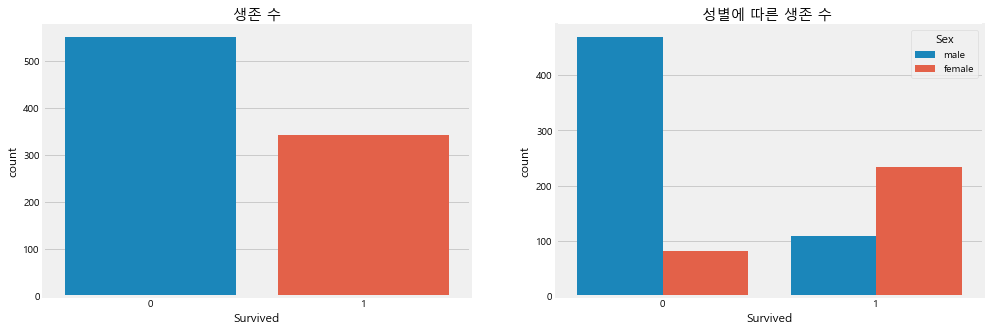

In [4]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(train.Survived)
plt.title('생존 수')

plt.subplot(1,2,2)
sns.countplot(x='Survived',hue='Sex',data=train)
plt.title('성별에 따른 생존 수 ')

1) 왼쪽 그래프에서 사망한 사람이 약 500명, 생존한 사람이 약 300명인 것을 알 수 있음

2) 남자의 경우 사망자가 압도적으로 많고, 여성의 경우 생존자가 더 많은 것을 알 수 있음 

### Null 값 확인

Text(0.5, 1, 'Null Values in Training Set')

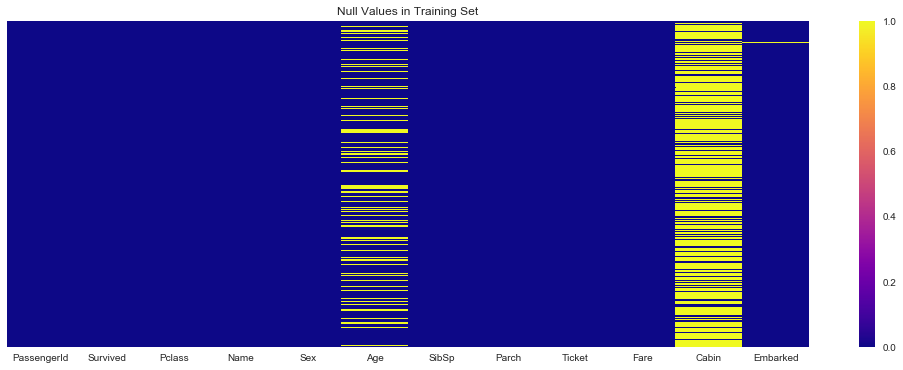

In [5]:
plt.style.use('seaborn')
plt.figure(figsize=(16,6))
sns.heatmap(train.isnull(),yticklabels=False, cmap='plasma')
plt.title('Null Values in Training Set')

'Age' , 'Cabin', 'Embarked' 컬럼에서 null값이 있음을 확인

### Pclass 에 따른 생존 여부

Text(0.5, 1.0, 'Pclass 별 사망자 수')

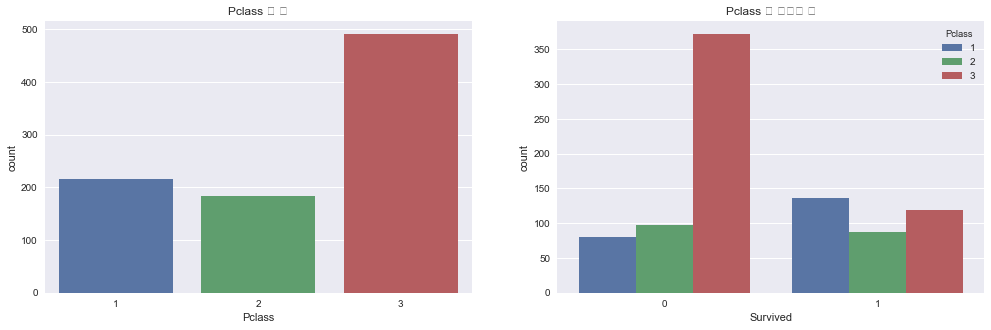

In [6]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(train['Pclass'])
plt.title('Pclass 별 수')

plt.subplot(1,2,2)
sns.countplot(x='Survived',hue='Pclass', data=train)
plt.title('Pclass 별 사망자 수')

1) Pclass 3이 가장 많음 (1이 가장 비쌈)

2) pclass 1에서 사망자가 가장적으며, 생존자도 가장 많음, 3에서 가장 많이 죽었음

-> 돈 많은 사람부터 살려줬거나, pclass좌석이 생존하기 유리한 위치였나?

In [7]:
survived_table=train.groupby('Pclass')['Survived'].value_counts(normalize=True).unstack()*100

In [8]:
# pclass 별 생존율
survived_table[1]

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: 1, dtype: float64

### 전체 나이분포 

Text(0.5, 1.0, 'Age Distribution')

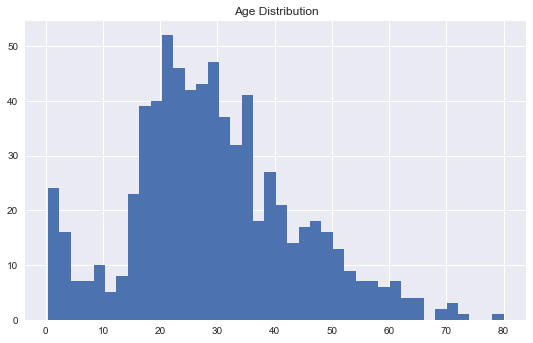

In [10]:
train['Age'].hist(bins=40)
plt.title('Age Distribution')

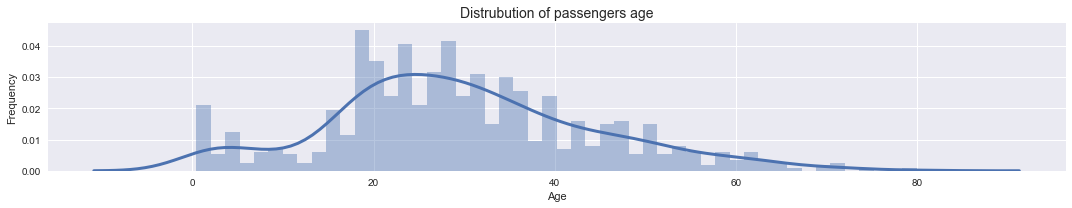

In [12]:
plt.figure(figsize=(15, 3))

sns.distplot(train[(train["Age"] > 0)].Age, kde_kws={"lw": 3}, bins = 50)

plt.title('Distrubution of passengers age',fontsize= 14)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()



### hist vs distplot
pyplot.hist 를 seaborn.displot 으로 대체할 수 있다.

연속된 변수의 프리퀀시를 나타내는데에 사용하며 distplot에서 더 다양한 조건 값이 추가로 제공된다.

### Boxplot, Scatterplot 이용한 나이에 따른 생존자 확인

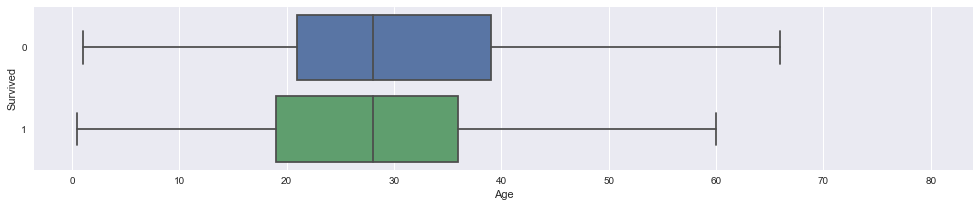

In [18]:
plt.figure(figsize=(15,3))

# 1. Boxplot
# orient 바꿔주는것이 중요 
sns.boxplot(data=train, x='Age', y='Survived',orient='h',fliersize=0)


In [ ]:
plt.figure(figsize=(15,3))

# 1. Boxplot
# orient 바꿔주는것이 중요 
sns.boxplot(data=train, x='Age', y='Survived',orient='h',fliersize=0)

#2. scatterplot 추가 
sns.stripplot(data=train, y='Survived', x='Age',orient='h')